In [ ]:
!pip install keras_bert

  Created wheel for keras-bert: filename=keras_bert-0.88.0-py3-none-any.whl size=34204 sha256=13770e7424c83b9c819f68410adb113a5a23405bcc7c51c1ae9586588d07fbc3
  Stored in directory: /root/.cache/pip/wheels/a2/90/cd/c038f2366929a3a5e3414a303b673e10235e802d871d29a835
  Created wheel for keras-transformer: filename=keras_transformer-0.39.0-py3-none-any.whl size=12842 sha256=88c73ec484cc6f147dd729d3fc9ca80ceabe385ca4a41241ba28ad4325231855
  Stored in directory: /root/.cache/pip/wheels/bc/01/e0/5a1a14bed6726f2ed73f7917d2d2c2d4081d2c88426dea07ce
  Created wheel for keras-embed-sim: filename=keras_embed_sim-0.9.0-py3-none-any.whl size=4504 sha256=82a5733e963d51332a048de1eb0cb1bbe4eb6d2d07a7850e6f80aecc898ace10
  Stored in directory: /root/.cache/pip/wheels/a8/1e/d2/9bc15513dd2f8b9de3e628b3aa9d2de49e721deef6bbd1497e
  Created wheel for keras-layer-normalization: filename=keras_layer_normalization-0.15.0-py3-none-any.whl size=5224 sha256=c3bc9370dc533ef81a82d80184f4bf56324d706de1755d06a809e30e1

In [ ]:
import sys
import numpy as np
from keras_bert import load_vocabulary, get_pretrained, PretrainedList, get_checkpoint_paths

In [ ]:
model_path = get_pretrained(PretrainedList.multi_cased_base)

662913024/662903077 [==============================] - 5s 0us/step


In [ ]:
paths = get_checkpoint_paths(model_path)
print(f'config : {paths.config}')
print(f'checkpoint : {paths.checkpoint}')
print(f'vocab : {paths.vocab}')      

config : /root/.keras/datasets/multi_cased_L-12_H-768_A-12/bert_config.json
checkpoint : /root/.keras/datasets/multi_cased_L-12_H-768_A-12/bert_model.ckpt
vocab : /root/.keras/datasets/multi_cased_L-12_H-768_A-12/vocab.txt


In [ ]:
from keras_bert import load_trained_model_from_checkpoint

In [ ]:
SEQ_LEN = 384
model = load_trained_model_from_checkpoint(paths.config, 
                                           paths.checkpoint, 
                                           training = False, 
                                           trainable = True, 
                                           seq_len = SEQ_LEN)

In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        [(None, 384)]        0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      [(None, 384)]        0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 384, 768), ( 91812096    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 384, 768)     1536        Input-Segment[0][0]              
_______________________________________________________________________________________

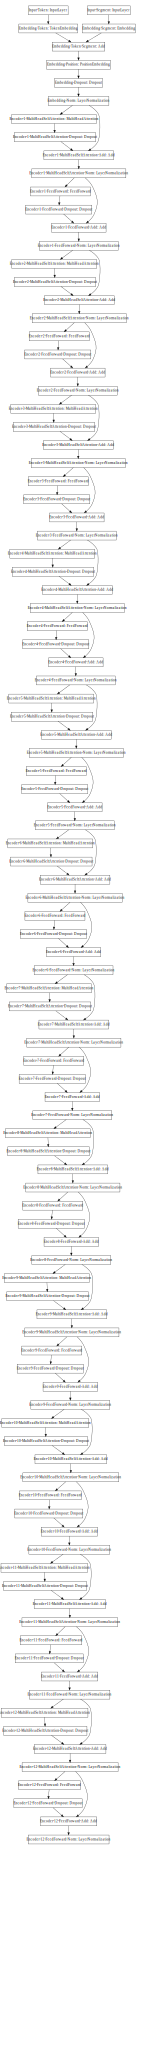

In [ ]:
from IPython.display import SVG
from keras.utils import model_to_dot


SVG(model_to_dot(model, dpi=65).create(prog='dot', format='svg'))

In [ ]:
model = load_trained_model_from_checkpoint(paths.config, 
                                           paths.checkpoint, 
                                           training = True, 
                                           trainable = True, 
                                           seq_len = SEQ_LEN)
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        [(None, 384)]        0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      [(None, 384)]        0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 384, 768), ( 91812096    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 384, 768)     1536        Input-Segment[0][0]              
_______________________________________________________________________________________

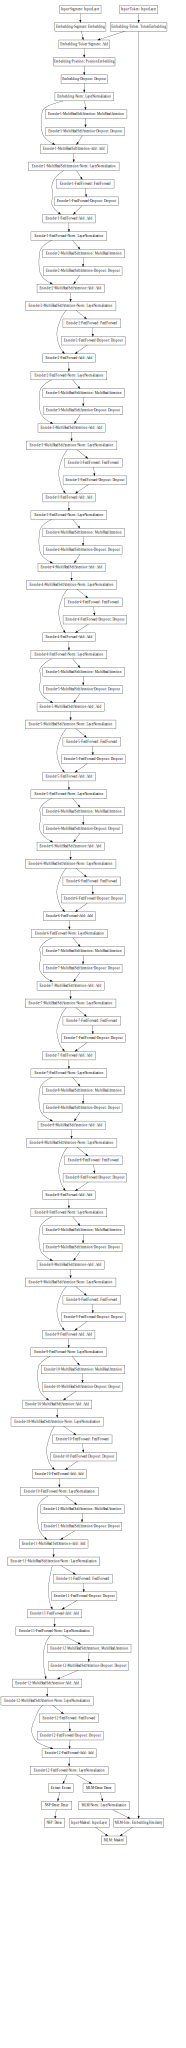

In [ ]:
SVG(model_to_dot(model, dpi=65).create(prog='dot', format='svg'))